In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

**DATA ANALYSIS**

In [3]:
# Load the data
file_path = 'side_effect_data 1.xlsx'
df = pd.read_excel(file_path, sheet_name=0)

# Display the number of rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Kullanici_id                      2357 non-null   int64         
 1   Cinsiyet                          1579 non-null   object        
 2   Dogum_Tarihi                      2357 non-null   datetime64[ns]
 3   Uyruk                             2357 non-null   object        
 4   Il                                2130 non-null   object        
 5   Ilac_Adi                          2357 non-null   object        
 6   Ilac_Baslangic_Tarihi             2357 non-null   datetime64[ns]
 7   Ilac_Bitis_Tarihi                 2357 non-null   datetime64[ns]
 8   Yan_Etki                          2357 non-null   object        
 9   Yan_Etki_Bildirim_Tarihi          2357 non-null   datetime64[ns]
 10  Alerjilerim                       1873 non-null 

In [4]:
# Display the first five rows of the DataFrame
df.head()

,Kullanici_id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy
0,107,Male,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-,103.0,191.0
1,140,Male,1939-10-12,Turkiye,Trabzon,fluphenazine hcl,2022-01-09,2022-03-08,Yorgunluk,2022-02-03 20:48:17,Toz,NaN,"Guatr, Diger","Hipertansiyon, Kalp Hastaliklari",,"KOAH, Diyabet",NaN,81.0,181.0
2,2,Female,1976-12-17,Turkiye,Canakkale,warfarin sodium,2022-01-11,2022-03-12,Carpinti,2022-02-04 05:29:20,Muz,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,B RH-,93.0,158.0
3,83,Male,1977-06-17,Turkiye,Adana,valproic acid,2022-01-04,2022-03-12,Sinirlilik,2022-02-08 01:01:21,Pancar,"Diyabet, Diger","Kalp Hastaliklari, Diger",NaN,Astim,"Kalp Hastaliklari, Kanser",AB RH-,NaN,165.0
4,7,Female,1976-09-03,Turkiye,Izmir,carbamazepine extended release,2022-01-13,2022-03-06,Agizda Farkli Bir Tat,2022-02-12 05:33:06,NaN,"Diyabet, Kalp Hastaliklari","Alzheimer, Hipertansiyon","Kan Hastaliklari, Kemik Erimesi","Diyabet, Diger","Alzheimer, Hipertansiyon",AB RH-,99.0,172.0


In [5]:
# Display the last five rows of the DataFrame
df.tail()

,Kullanici_id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy
2352,9,NaN,1957-01-04,Turkiye,NaN,"desoximetasone spray, non-aerosol",2022-01-13,2022-03-04,Ishal,2022-02-12 19:13:43,Ispanakgiller,NaN,,"Astim, Guatr",,"KOAH, Kan Hastaliklari",NaN,50.0,152.0
2353,101,Female,2004-11-09,Turkiye,Mersin,olanzapine-fluoxetine,2022-01-02,2022-03-05,Agizda Farkli Bir Tat,2022-02-19 17:39:48,Istiridye,NaN,"Hipertansiyon, Astim","Astim, Kemik Erimesi","KOAH, Kan Hastaliklari","Astim, Diyabet",AB RH-,NaN,178.0
2354,127,Female,1951-11-29,Turkiye,Mersin,trazodone,2022-01-02,2022-03-12,Yorgunluk,2022-02-03 20:48:17,Deniz Urunler,"Guatr, KOAH","Alzheimer, Diger",NaN,"Astim, Diyabet","Kalp Hastaliklari, Diger",B RH+,90.0,203.0
2355,178,Male,1980-01-30,Turkiye,Kayseri,duloxetine hydrochloride,2022-01-02,2022-03-08,Carpinti,2022-02-04 05:29:20,Sari Kantaron,"Alzheimer, Diger",NaN,"Kalp Hastaliklari, Diger","Kanser, KOAH","Astim, KOAH",NaN,90.0,184.0
2356,174,Female,1986-11-07,Turkiye,Istanbul,valproic acid,2022-01-06,2022-03-06,Istah Artisi,2022-02-17 07:08:01,NaN,"Alzheimer, Diger","Kanser, Diger","Hipertansiyon, Kan Hastaliklari",,"Hipertansiyon, Diger",AB RH+,79.0,175.0


In [6]:
df.axes

[RangeIndex(start=0, stop=2357, step=1),
 Index(['Kullanici_id', 'Cinsiyet', 'Dogum_Tarihi', 'Uyruk', 'Il', 'Ilac_Adi',
        'Ilac_Baslangic_Tarihi', 'Ilac_Bitis_Tarihi', 'Yan_Etki',
        'Yan_Etki_Bildirim_Tarihi', 'Alerjilerim', 'Kronik Hastaliklarim',
        'Baba Kronik Hastaliklari', 'Anne Kronik Hastaliklari',
        'Kiz Kardes Kronik Hastaliklari', 'Erkek Kardes Kronik Hastaliklari',
        'Kan Grubu', 'Kilo', 'Boy'],
       dtype='object')]

In [7]:
# Display the number of missing values in each column
df.isnull().sum()

Kullanici_id                          0
Cinsiyet                            778
Dogum_Tarihi                          0
Uyruk                                 0
Il                                  227
Ilac_Adi                              0
Ilac_Baslangic_Tarihi                 0
Ilac_Bitis_Tarihi                     0
Yan_Etki                              0
Yan_Etki_Bildirim_Tarihi              0
Alerjilerim                         484
Kronik Hastaliklarim                392
Baba Kronik Hastaliklari            156
Anne Kronik Hastaliklari            217
Kiz Kardes Kronik Hastaliklari       97
Erkek Kardes Kronik Hastaliklari    121
Kan Grubu                           347
Kilo                                293
Boy                                 114
dtype: int64

In [8]:
# Display the number of duplicate rows
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe()

,Kullanici_id,Dogum_Tarihi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki_Bildirim_Tarihi,Kilo,Boy
count,2357.000000,2357,2357,2357,2357,2064.000000,2243.000000
mean,97.216801,1974-11-25 04:06:12.677131936,2022-01-07 10:47:36.173101312,2022-03-10 16:25:27.365294848,2022-02-10 17:09:30.742044928,80.863857,174.638431
min,1.000000,1939-10-12 00:00:00,2022-01-01 00:00:00,2022-03-02 00:00:00,2022-02-01 04:34:33,50.000000,145.000000
25%,47.000000,1959-02-05 00:00:00,2022-01-04 00:00:00,2022-03-06 00:00:00,2022-02-04 05:29:20,65.000000,160.000000
50%,97.000000,1973-09-09 00:00:00,2022-01-07 00:00:00,2022-03-11 00:00:00,2022-02-09 20:53:54,83.000000,176.000000
75%,146.000000,1992-03-24 00:00:00,2022-01-11 00:00:00,2022-03-15 00:00:00,2022-02-17 07:08:01,96.000000,187.000000
max,196.000000,2011-04-25 00:00:00,2022-01-14 00:00:00,2022-03-19 00:00:00,2022-02-19 21:47:39,110.000000,203.000000
std,57.017200,NaN,NaN,NaN,NaN,18.635269,16.516552


**DATA VISUALIZATION** 

Before making any decisions about imputing or encoding,I will create visualizations for the categorical and numerical variables. This will give me insights into distributions, correlations, and potential relationships.

1. ##### Age (derived from DOB) -- feature engineering

I need to visualize age to understand its distribution and potential relationships with side effects. This feature will be derived from the date of birth.
* Age is typically a critical health factor, and older populations may experience more severe side effects.
* This will guide how we treat age during model building (e.g., bucketing into age groups or normalizing it).


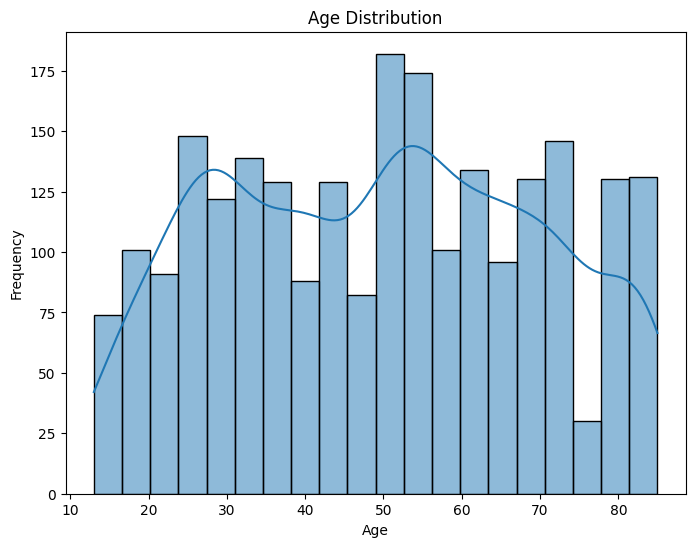

In [14]:
# Calculate age from birth date
df['Age'] = pd.to_datetime('today').year - df['Dogum_Tarihi'].dt.year

# Visualize the age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


The age distribution shows me a wide range, with most individuals clustered between 40 and 70 years old. This is a typical range where chronic diseases and medication usage are more common.

Preprocessing ideas:
* I can treat age as a continuous variable, but it might be more meaningful to create age groups (e.g., 0-20, 21-40, etc.), especially if the relationship between age and side effects is non-linear.
* I should check if there are outliers or unrealistic ages (e.g., extremely old or young individuals) that may need to be removed or flagged.

2. ##### Medication Duration (Derived from Ilac_Baslangic_Tarihi and Ilac_Bitis_Tarihi) -- feature engineering
The length of time a patient is on medication can strongly influence the likelihood of side effects.
* Medication duration may correlate with certain side effects. Patients on longer treatments might experience more chronic issues.
* I will use this visualization to decide if we should group durations or treat them as continuous data.

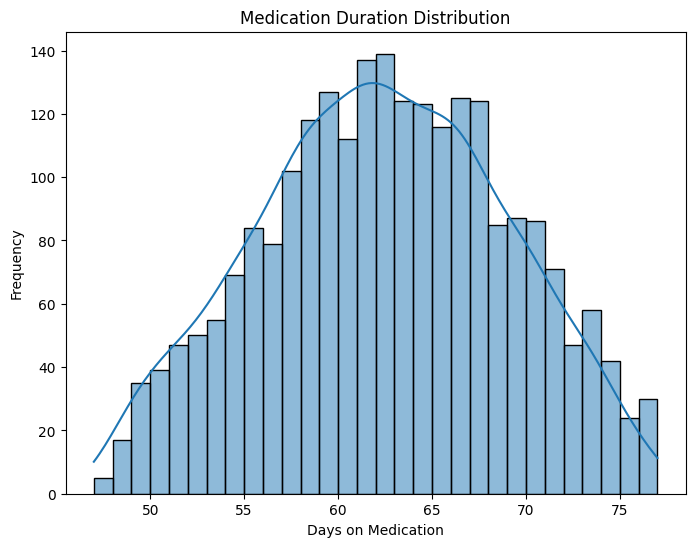

In [15]:
# Calculate medication duration in days
df['Medication_Duration'] = (df['Ilac_Bitis_Tarihi'] - df['Ilac_Baslangic_Tarihi']).dt.days

# Visualize the medication duration distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Medication_Duration'], bins=30, kde=True)
plt.title('Medication Duration Distribution')
plt.xlabel('Days on Medication')
plt.ylabel('Frequency')
plt.show()


The medication duration has a right-skewed distribution, with most patients taking medication for about 40-60 days, but some have much longer durations.

Preprocessing ideas:
*  I can either treat this as a continuous variable or group it into categories like "short-term" and "long-term" treatments, depending on the correlations we find with side effects.
*  There are some very long durations, which could indicate either chronic medication usage or data entry errors. I should examine these outliers more closely.

3. ##### Side Effects (Yan_Etki)
Understanding the frequency of each side effect will help me to  manage the class imbalance in the data, which is crucial for effective model training.


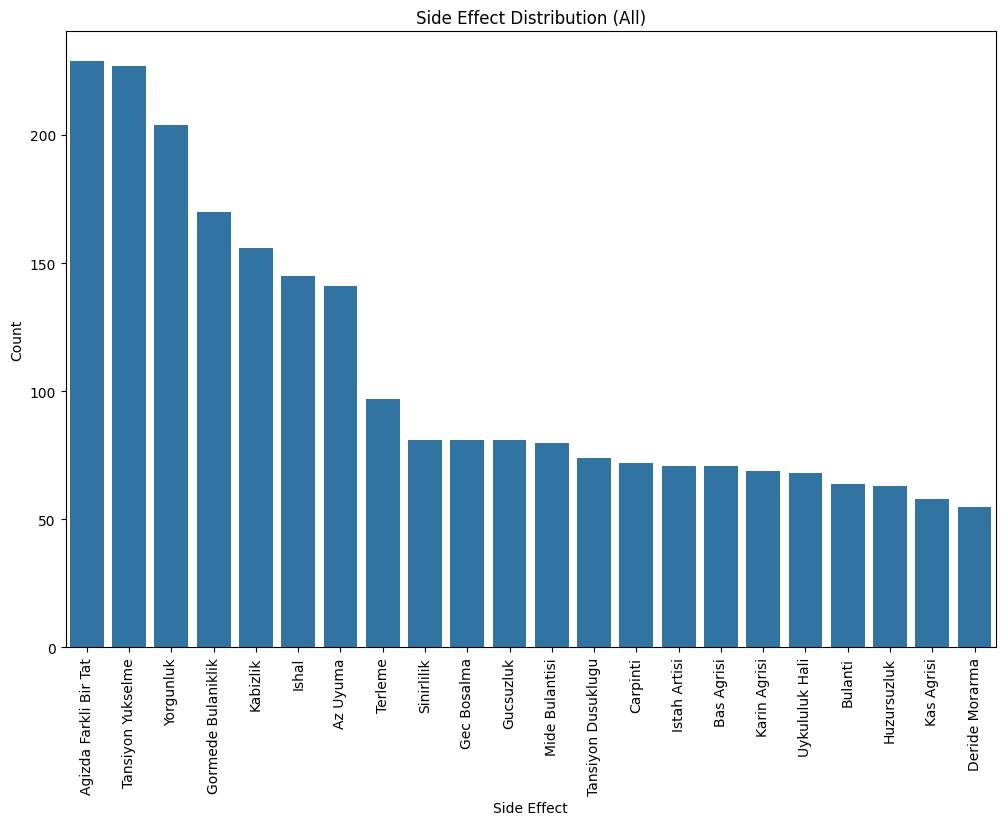

In [16]:
# Visualize all side effects
plt.figure(figsize=(12, 8))
side_effect_counts_full = df['Yan_Etki'].value_counts()
sns.barplot(x=side_effect_counts_full.index, y=side_effect_counts_full.values)
plt.title('Side Effect Distribution (All)')
plt.xlabel('Side Effect')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


There is a significant imbalance in the side effects, with some like Kabizlik (Constipation) and Yorgunluk (Fatigue) occurring much more frequently than others.

Preprocessing ideas:
* The imbalance between frequent and rare side effects can lead to poor model performance, particularly for underrepresented side effects. Techniques like oversampling or undersampling might be needed.
* I can consider grouping less frequent side effects into a category like "Other" to simplify the classification task.

4. ##### Correlation Between Numerical Features 
It’s important to check the correlation between numerical features like weight (Kilo), height (Boy), and age. Highly correlated features might require dimensionality reduction techniques.
* Identifying multicollinearity (high correlation between features) help me avoid redundant data in the model.
* This will guide me on whether to keep or remove certain features.



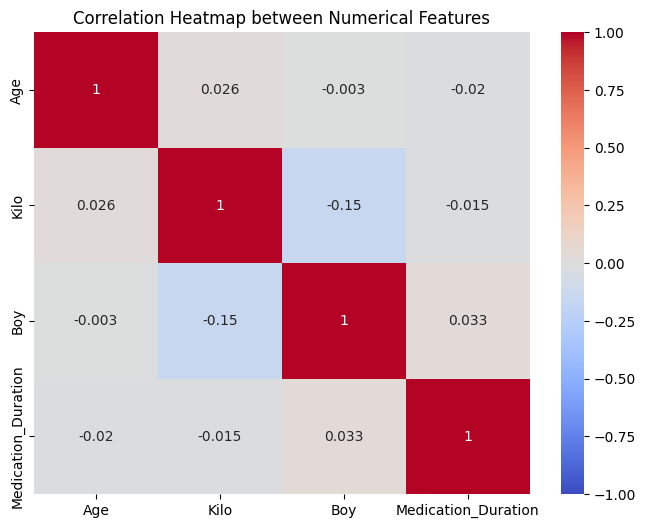

In [17]:
# Select numerical columns for correlation analysis
numerical_columns = ['Age', 'Kilo', 'Boy', 'Medication_Duration']

# Calculate correlations
corr_matrix = df[numerical_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Numerical Features')
plt.show()


Age, Kilo (Weight), and Boy (Height) show low correlations with each other. This means that they are likely independent factors, which is beneficial for model generation since each variable adds unique information.

Preprocessing ideas:
* Since there is no strong correlation, I can safely use all of these variables in the model without needing to reduce dimensions.
* Given that height and weight are not strongly correlated, creating a new feature, BMI, could provide additional insights that may correlate more strongly with side effects.

5. ##### Categorical Features
Categorical variables can be key predictors, and their distribution will guide us on encoding strategies.


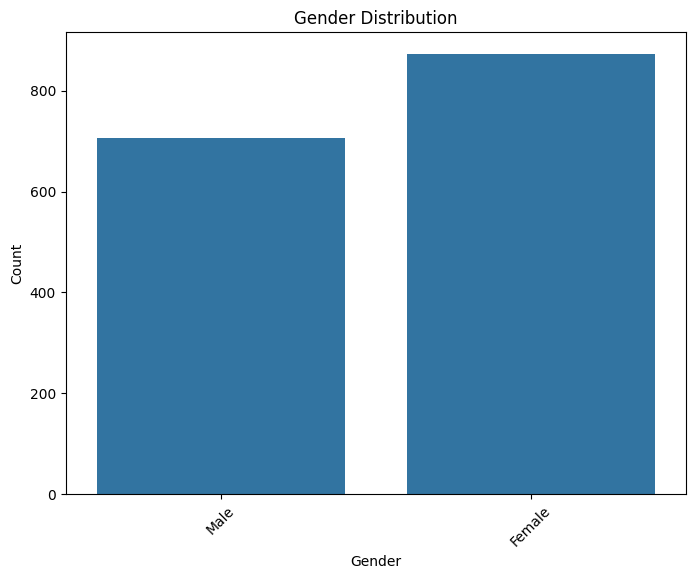

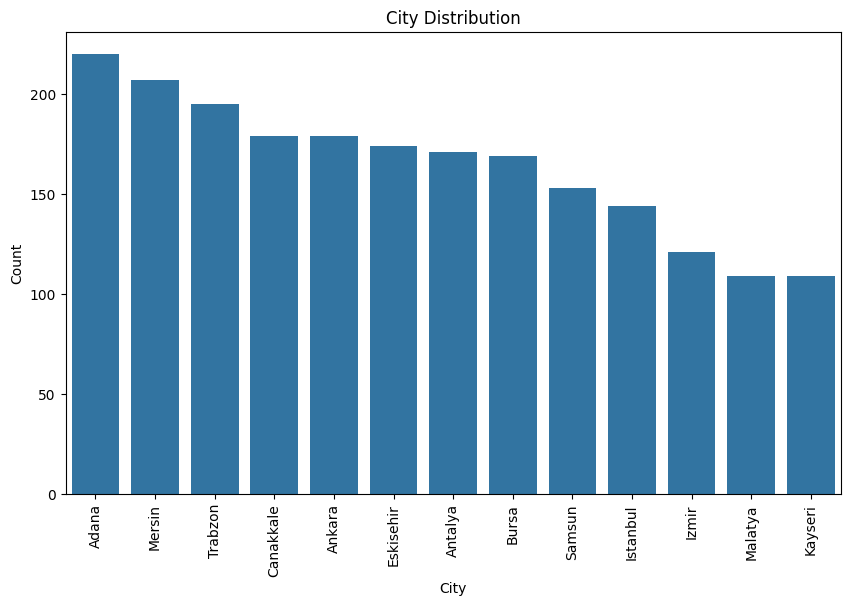

In [19]:
# Visualize distribution of gender
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Cinsiyet')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Visualize distribution of city (Il)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Il', order=df['Il'].value_counts().index)
plt.title('City Distribution')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()



Gender:
There’s a missing data issue in the gender column, but the distribution suggests a moderate imbalance, with more males than females.

Preprocessing ideas:
*  I need to impute missing gender values, possibly using the most frequent category (male) or based on other features like chronic diseases.
*  I'll use One-Hot Encoding to convert this into a binary format (Male/Female), as this will work well for most models.

City:
City (Il) is an important geographical feature that might correlate with side effects due to regional health differences.

Preprocessing ideas:
* As with nationality, cities with very low representation could be grouped into an "Other" category to avoid sparse categorical values.
* I can use One-Hot Encoding for the cities, but it might result in many new columns. A decision can be made after grouping rare cities together to reduce dimensionality.

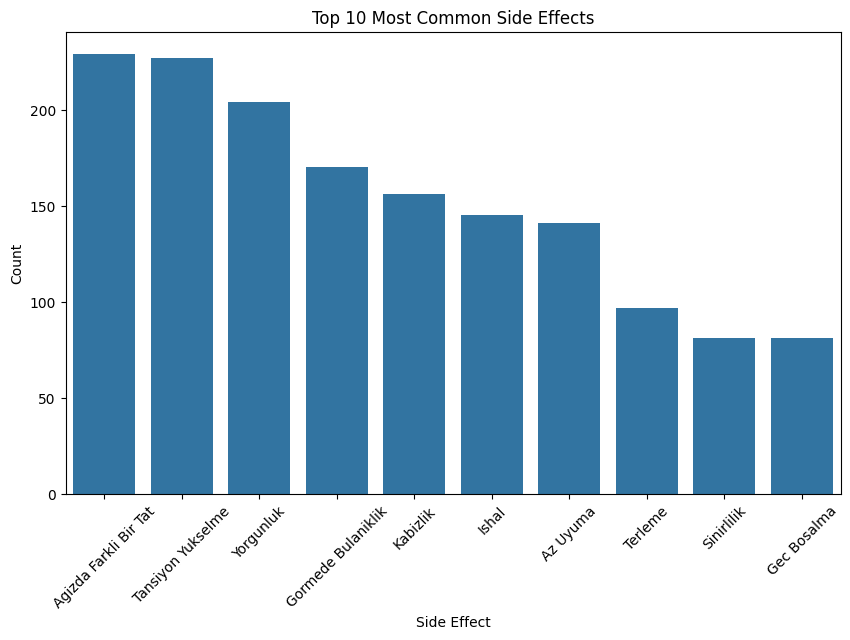

In [11]:
# Visualize side effects distribution (Top 10 most common)
plt.figure(figsize=(10, 6))
side_effect_counts = df['Yan_Etki'].value_counts().nlargest(10)
sns.barplot(x=side_effect_counts.index, y=side_effect_counts.values)
plt.title('Top 10 Most Common Side Effects')
plt.xlabel('Side Effect')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

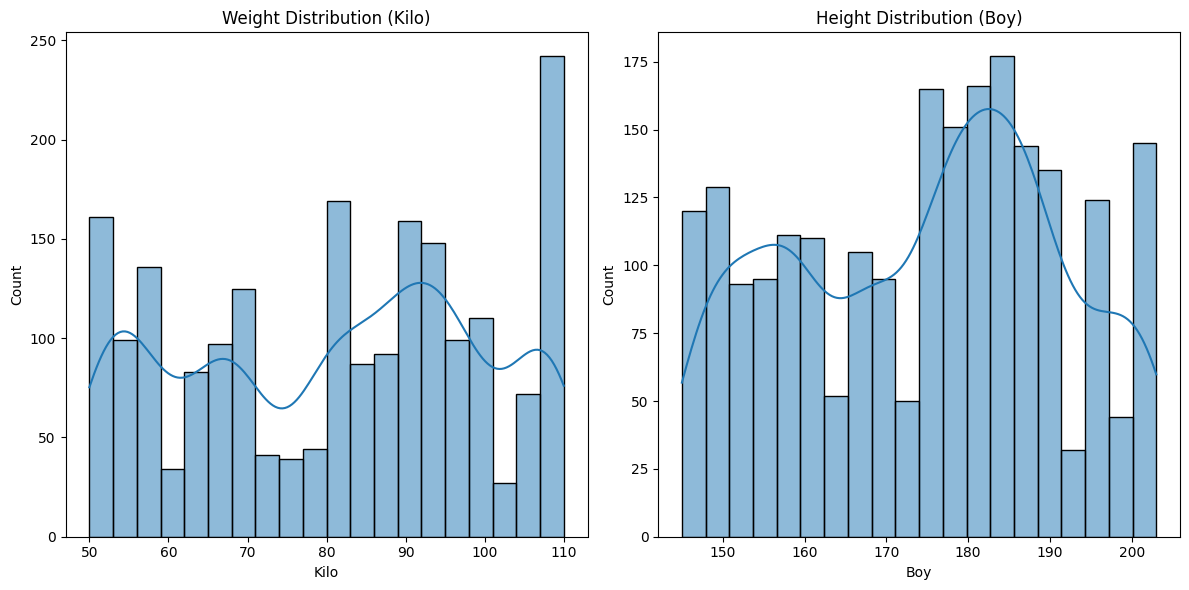

In [12]:
# Visualize distribution of weight and height
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Kilo'].dropna(), bins=20, kde=True)
plt.title('Weight Distribution (Kilo)')

plt.subplot(1, 2, 2)
sns.histplot(df['Boy'].dropna(), bins=20, kde=True)
plt.title('Height Distribution (Boy)')

plt.tight_layout()
plt.show()

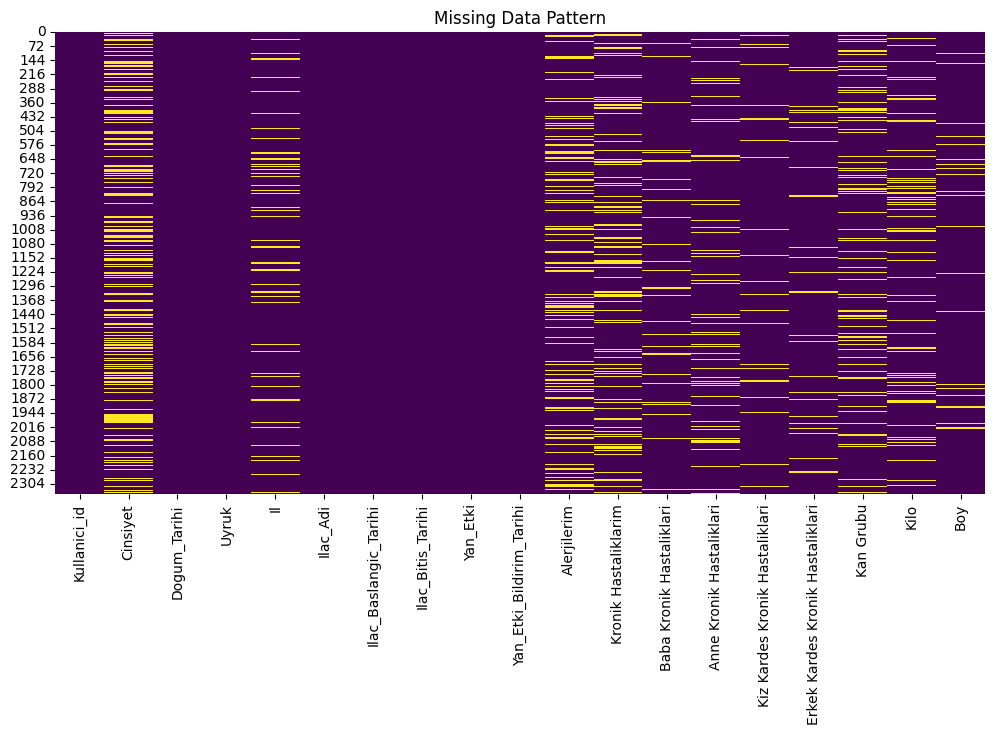

In [13]:
# Visualize missing data pattern
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Pattern')
plt.show()

**DATA PREPROCESSİNG**


In [26]:
# Create a copy of the original data
data_copy = df.copy()


# 1. Deriving Age from "Dogum_Tarihi"
today = datetime.today()
data_copy['Dogum_Tarihi'] = pd.to_datetime(data_copy['Dogum_Tarihi'], errors='coerce')
data_copy['Age'] = (today - data_copy['Dogum_Tarihi']).dt.days // 365  # convert days to years

# Check for unrealistic ages
data_copy = data_copy[(data_copy['Age'] > 0) & (data_copy['Age'] < 120)]  # Assuming realistic ages between 0 and 120

# 2. Medication Duration from "Ilac_Baslangic_Tarihi" and "Ilac_Bitis_Tarihi"
data_copy['Ilac_Baslangic_Tarihi'] = pd.to_datetime(data_copy['Ilac_Baslangic_Tarihi'], errors='coerce')
data_copy['Ilac_Bitis_Tarihi'] = pd.to_datetime(data_copy['Ilac_Bitis_Tarihi'], errors='coerce')
data_copy['Medication_Duration'] = (data_copy['Ilac_Bitis_Tarihi'] - data_copy['Ilac_Baslangic_Tarihi']).dt.days

# Check for unrealistic durations
data_copy = data_copy[data_copy['Medication_Duration'] >= 0]  # Remove negative or invalid durations

# 3. Handling Side Effects (Yan_Etki)
# Check for class imbalance in side effects
side_effect_counts = data_copy['Yan_Etki'].value_counts()

# Group rare side effects (occurring less than a threshold) into 'Other'
threshold = 10  # This can be adjusted based on the data distribution
rare_side_effects = side_effect_counts[side_effect_counts < threshold].index
data_copy['Yan_Etki'] = data_copy['Yan_Etki'].replace(rare_side_effects, 'Other')

# 4. Correlation between Numerical Features (Kilo, Boy, Age)
# We will create a new feature: BMI (Body Mass Index)
data_copy['BMI'] = data_copy['Kilo'] / (data_copy['Boy']/100)**2  # BMI formula: weight(kg) / height(m)^2
# Checking for unrealistic BMI values (between 10 and 60 considered normal)
data_copy = data_copy[(data_copy['BMI'] >= 10) & (data_copy['BMI'] <= 60)]

# 5. Categorical Features: Gender and City
# Imputing missing Gender values with the most frequent category
data_copy['Cinsiyet'].fillna(data_copy['Cinsiyet'].mode()[0], inplace=True)

# One-Hot Encoding for Gender
data_copy = pd.get_dummies(data_copy, columns=['Cinsiyet'], drop_first=True)

# Grouping rare cities into 'Other'
city_counts = data_copy['Il'].value_counts()
rare_cities = city_counts[city_counts < threshold].index
data_copy['Il'] = data_copy['Il'].replace(rare_cities, 'Other')

# One-Hot Encoding for City
data_copy = pd.get_dummies(data_copy, columns=['Il'], drop_first=True)

# To display the first few rows of the preprocessed data
print(data_copy.head())



   Kullanici_id Dogum_Tarihi    Uyruk                        Ilac_Adi  \
0           107   1960-03-01  Turkiye                 trifluoperazine   
1           140   1939-10-12  Turkiye                fluphenazine hcl   
2             2   1976-12-17  Turkiye                 warfarin sodium   
4             7   1976-09-03  Turkiye  carbamazepine extended release   
5           131   1982-01-05  Turkiye                   fluoxetine dr   

  Ilac_Baslangic_Tarihi Ilac_Bitis_Tarihi               Yan_Etki  \
0            2022-01-09        2022-03-04               Kabizlik   
1            2022-01-09        2022-03-08              Yorgunluk   
2            2022-01-11        2022-03-12               Carpinti   
4            2022-01-13        2022-03-06  Agizda Farkli Bir Tat   
5            2022-01-07        2022-03-19  Agizda Farkli Bir Tat   

  Yan_Etki_Bildirim_Tarihi Alerjilerim             Kronik Hastaliklarim  ...  \
0      2022-02-19 18:28:43       Ceviz  Hipertansiyon, Kan Hastaliklari 

C:\Users\elanu\AppData\Local\Temp\ipykernel_18212\3610407850.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_copy['Cinsiyet'].fillna(data_copy['Cinsiyet'].mode()[0], inplace=True)


In [27]:
# Display the number of duplicate rows
data_copy.duplicated().sum()

np.int64(0)

# CONCLUSION
After the preprocessing phase, ı now have a clean, well-structured dataset that is ready for model building. Key transformations included:
* Derived and cleaned the Age and Medication Duration features.
* Addressed class imbalance in the Side Effects column.
* Created a meaningful feature, BMI, to capture health-related insights.
* Handled missing categorical data and encoded features using One-Hot Encoding.

The dataset is now in a strong position for the next phase of analysis, such as feature selection, model training, or further exploration for drug side effect prediction.